<a href="https://colab.research.google.com/github/SamayitaCodes/AmazonClone/blob/main/SE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('data1.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
def calculate_nan_percentage(df):
  # Get the number of rows in the DataFrame
  total_rows = len(df)

  # Calculate the number of NaN values in each column
  missing_values = df.isnull().sum()

  # Calculate the percentage of NaN values in each column
  percentage_missing =(missing_values / total_rows) * 100

  return percentage_missing

In [ ]:
calculate_nan_percentage(df)

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


In [ ]:
df['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [ ]:
# fill null in bmi with mean value
mean = df.bmi.mean()
df['bmi'] = df['bmi'].fillna(mean)

In [ ]:
calculate_nan_percentage(df)

,0
id,0.0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
ever_married,0.0
work_type,0.0
Residence_type,0.0
avg_glucose_level,0.0
bmi,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df['age'] = df['age'].astype('int')

In [ ]:
df.nunique(axis = 0)

,0
id,5110
gender,3
age,83
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,419


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df['gender'] = df['gender'][df['gender']!='Other']

In [ ]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
df.age.describe()

,age
count,5110.000000
mean,43.215264
std,22.633866
min,0.000000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [ ]:
(df['age'] == 0).sum()

43

In [ ]:
df['age'] = df['age'][df['age'] != 0]

In [ ]:
df.age.describe()

,age
count,5067.000000
mean,43.582001
std,22.375297
min,1.000000
25%,26.000000
50%,45.000000
75%,61.000000
max,82.000000


In [ ]:
df.dropna(inplace = True)

# Univariate Analysis


Distribution of categorical variables

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# 2. Extract columns that have only two unique values (binary categorical features like 0, 1)
binary_cols = [col for col in df.columns if df[col].nunique() <= 4]

# 3. Combine both the object type columns and binary columns into one list
all_categorical_cols = set(categorical_cols + binary_cols)

# Print the final list of all categorical features, including binary ones
print("Categorical features including binary ones:", all_categorical_cols)

Categorical features including binary ones: {'gender', 'heart_disease', 'smoking_status', 'ever_married', 'work_type', 'hypertension', 'stroke', 'Residence_type'}


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_barplots(data, columns, rows):

    fig = make_subplots(rows=rows, cols=columns, subplot_titles=[f'Bar plot of {col}' for col in data.columns])

    for i, column in enumerate(data.columns):
        row = (i // columns) + 1
        col = (i % columns) + 1
        data_ = data[column].dropna().value_counts()  # Count the occurrences of each category

        # Add bar plot
        fig.add_trace(go.Bar(x=data_.index.astype(str), y=data_, name=f'{column} bar plot',
                             marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='black', width=1))),
                      row=row, col=col)

    # Update layout
    fig.update_layout(height=1000, width=1000, title_text="Bar Plots", showlegend=False)
    fig.show()


In [ ]:
df[list(all_categorical_cols)].astype('object').describe()

,gender,heart_disease,smoking_status,ever_married,work_type,hypertension,stroke,Residence_type
count,5066,5066,5066,5066,5066,5066,5066,5066
unique,2,2,4,2,5,2,2,2
top,Female,0,never smoked,Yes,Private,0,0,Urban
freq,2979,4790,1892,3353,2924,4568,4817,2573


In [ ]:
plot_barplots(df[list(all_categorical_cols)],3,3)

Distribution of Numerical variables

In [ ]:
numerical_cols = df.columns[~df.columns.isin(list(all_categorical_cols))]

In [ ]:
df.loc[: ,numerical_cols]

,id,age,avg_glucose_level,bmi
0,9046,67.0,228.69,36.600000
1,51676,61.0,202.21,28.893237
2,31112,80.0,105.92,32.500000
3,60182,49.0,171.23,34.400000
4,1665,79.0,174.12,24.000000
...,...,...,...,...
5105,18234,80.0,83.75,28.893237
5106,44873,81.0,125.20,40.000000
5107,19723,35.0,82.99,30.600000
5108,37544,51.0,166.29,25.600000


In [ ]:
def plot_boxplots(data, columns, rows):

    fig = make_subplots(rows=rows, cols=columns, subplot_titles=[f'Boxplot of {col}' for col in data.columns])

    for i, column in enumerate(data.columns):
        row = (i // columns) + 1
        col = (i % columns) + 1

        data_ = data[column].dropna()

        # Add box plot
        fig.add_trace(go.Box(y=data_, name=f'{column} boxplot', marker=dict(color='rgba(50, 171, 96, 0.6)',
        line=dict(color='black', width=1))), row=row, col=col)

    # Update layout
    fig.update_layout(height=1000, width=1000, title_text="Boxplots", showlegend=False)
    fig.show()

In [ ]:
df[numerical_cols].drop('id' , axis = 1).describe()

,age,avg_glucose_level,bmi
count,5066.000000,5066.000000,5066.000000
mean,43.585472,106.234272,28.983369
std,22.376141,45.396013,7.661451
min,1.000000,55.120000,10.300000
25%,26.000000,77.282500,23.900000
50%,45.000000,91.890000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [ ]:
plot_boxplots(df[numerical_cols].drop('id' , axis = 1) ,2,2 )

Overall Observations:

*   The dataset contains a relatively wide range of ages.
*   The glucose levels exhibit a significant number of outliers, potentially indicating health concerns or measurement errors.

*   The BMI distribution suggests a moderately overweight population with some individuals in the obese range.






---






**Proportions of patients with stroke**

In [ ]:
proportions_of_stroke_patients  = pd.DataFrame(df['stroke'].value_counts().reset_index())
proportions_of_stroke_patients

,stroke,count
0,0,4817
1,1,249


In [ ]:
fig = px.pie(
    proportions_of_stroke_patients,
    names='stroke',
    values='count',
    title='proportions of patients with stroke',
    hole=0.3,
)
fig.update_traces(
    textposition='outside',
    textinfo='percent+label'
)

fig.show()

The pie chart shows the proportions of patients with stroke.

*   95.1% of patients did not have a stroke (represented by the blue segment).
*   4.87% of patients had a stroke (represented by the red segment).

This indicates that a relatively small percentage of patients in the dataset experienced stroke.

# Bivariate Analysis

 Relationship between age and stroke

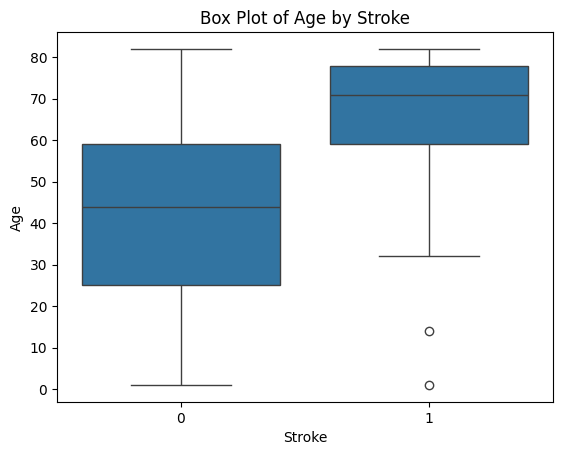

In [ ]:
#box plot
import seaborn as sns

sns.boxplot(x='stroke', y='age', data=df)
plt.title('Box Plot of Age by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

Overall,

the box plot suggests a positive association between age and stroke occurrence. Older individuals are more likely to experience stroke compared to younger individuals. However, there are exceptions, as indicated by the outliers in the stroke group.



---



Hypothesis Test


In [ ]:
import scipy.stats as stats

# Assuming df is your DataFrame
stroke_group = df['age'][df['stroke'] == 1]
no_stroke_group = df['age'][df['stroke'] == 0]

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(stroke_group, no_stroke_group)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 18.00764869257844
P-value: 2.5456246424311868e-70


Conclusion:

Based on these results, we can reject the null hypothesis with a high degree of confidence. This means there is strong evidence to suggest a statistically significant difference in age between individuals with and without stroke.



---



Smoking status vs stroke risk

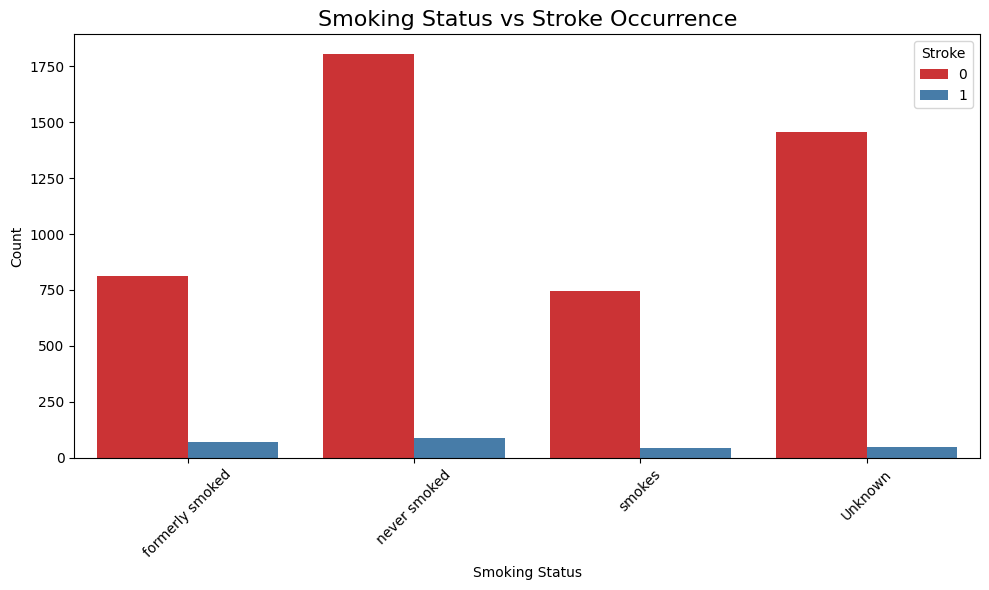

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='smoking_status', hue='stroke', data=df, palette='Set1')

# Add title and labels
plt.title('Smoking Status vs Stroke Occurrence', fontsize=16)
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 27.665293121159944
P-value: 4.269623154820198e-06


Conclusion:

1. Based on these results, we can reject the null hypothesis with a high degree of confidence. This means there is strong evidence to suggest a statistically significant association between smoking status and stroke risk.

2. In simpler terms, smoking status does influence stroke risk. Individuals who have smoked or currently smoke are more likely to experience stroke compared to those who have never smoked.



---



Correlation between blood glucose levels and stroke

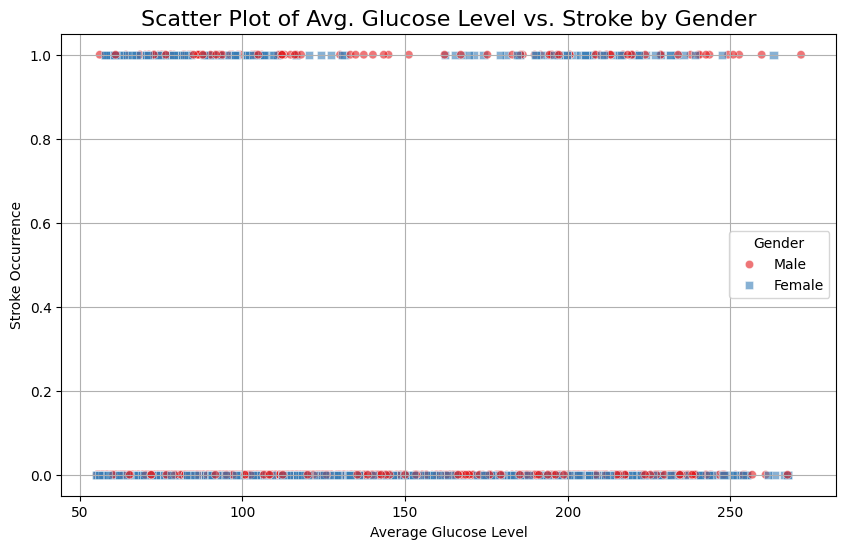

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='avg_glucose_level', y='stroke', hue='gender', data=df, style='gender',
                    palette='Set1', markers=['o', 's'], alpha=0.6)

plt.title('Scatter Plot of Avg. Glucose Level vs. Stroke by Gender', fontsize=16)
plt.xlabel('Average Glucose Level')
plt.ylabel('Stroke Occurrence')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Gender vs the likelihood of stroke

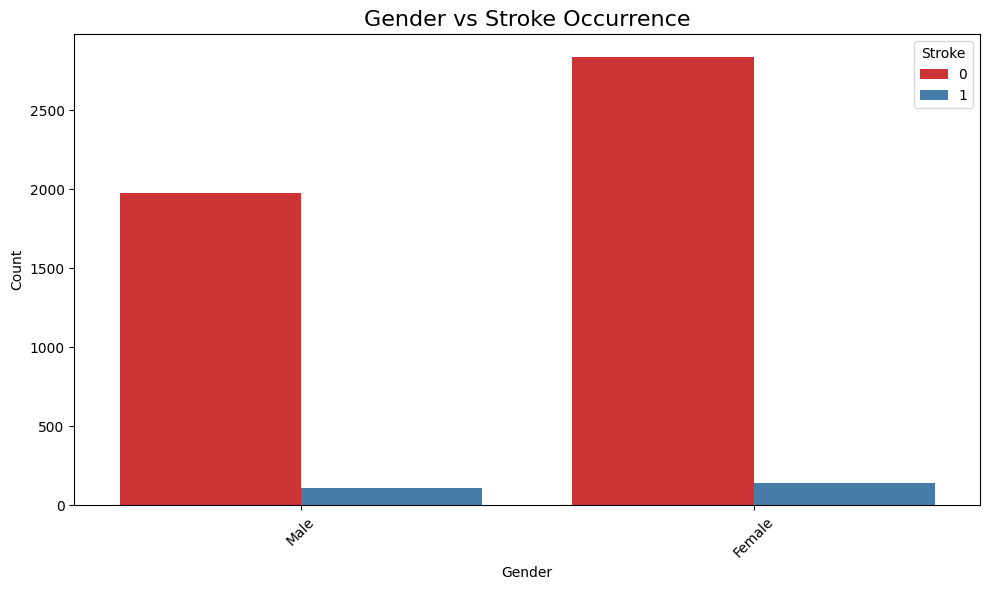

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='gender', hue='stroke', data=df, palette='Set1')

# Add title and labels
plt.title('Gender vs Stroke Occurrence', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

Hypothesis Testing: Gender and Stroke Risk

In [ ]:
contingency_table = pd.crosstab(df['gender'], df['stroke'])

chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 0.42228968780312515
P-value: 0.5157967401557528


Impact of blood pressure on Stroke

In [ ]:
contingency_table = pd.crosstab(df['hypertension'], df['stroke'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 80.1885969110217
P-value: 3.4032555411052174e-19




---



# Multivariate Analysis

How do multiple factors, such as smoking status and age influence the stroke rate?

In [ ]:
data = df.copy()

data['age_group'] = pd.cut(data['age'], bins=[1, 30, 40, 50, 60, 70, 80, 90], labels=['1-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

# Creating a pivot table for the heatmap
pivot_table = data.pivot_table(values='stroke', index='smoking_status', columns='age_group', aggfunc='mean')


<ipython-input-40-ed31c83dc30d>:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



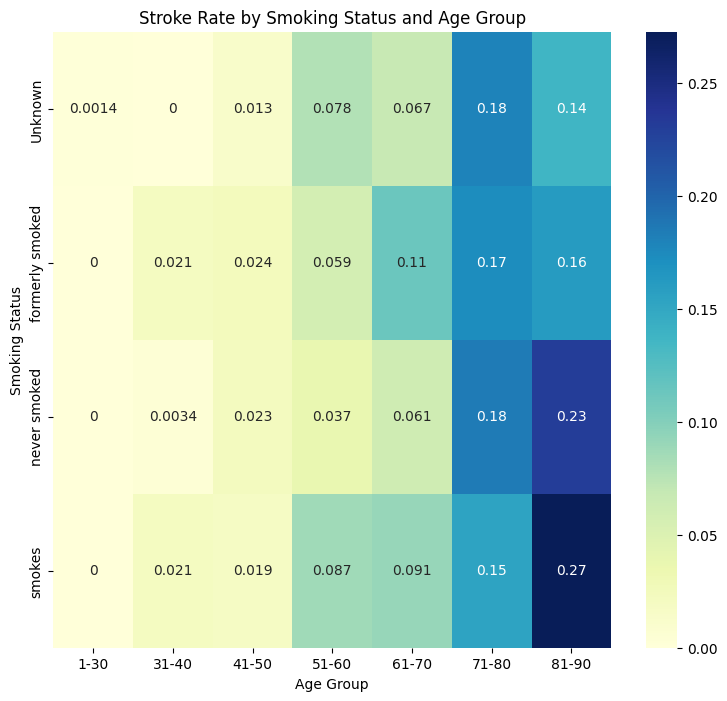

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Stroke Rate by Smoking Status and Age Group')
plt.ylabel('Smoking Status')
plt.xlabel('Age Group')
plt.show()

Key Observations:
1. Age-related risk: The overall trend indicates that the risk of stroke
increases with age, regardless of smoking status.
2. Smoking impact: Across all age groups, individuals with a smoking history (formerly smoked, smokes) generally have a higher risk of stroke compared to those who never smoked.
3. Age-smoking interaction: The effect of smoking on stroke risk appears to be more pronounced in older age groups. For example, the difference in stroke rates between smokers and never-smokers is more noticeable in the 61-70, 71-80, and 81-90 age groups.



---



How do multiple factors, such as age, hypertension, and heart disease , collectively relate to stroke?

In [ ]:
import statsmodels.api as sm

# Logistic Regression for Hypothesis Testing
data = df.copy()
data['intercept'] = 1# Adding an intercept for the logistic regression
data['age'] = data['age'].astype(float)
logit_model = sm.Logit(data['stroke'], data[['intercept', 'age', 'hypertension', 'heart_disease']])
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.158267
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5066
Model:                          Logit   Df Residuals:                     5062
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                  0.1926
Time:                        07:24:27   Log-Likelihood:                -801.78
converged:                       True   LL-Null:                       -992.98
Covariance Type:            nonrobust   LLR p-value:                 1.438e-82
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -7.0978      0.337    -21.068      0.000      -7.758      -6.438
age               0.0703      0.005     13.810      0.000       0.060       0.080
hypertension      0.4578      0.161      2.849      0.004       0.143       0.773
heart_disease     0.4086      0.186      2.197      0.028       0.044       0.773
=================================================================================
"""



---



Stroke rates across different work types and residence types combined

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(index=[df['work_type'], df['Residence_type']], columns=df['stroke'])
contingency_table

stroke                           0   1
work_type     Residence_type          
Govt_job      Rural            298  14
              Urban            326  19
Never_worked  Rural              7   0
              Urban             15   0
Private       Rural           1393  68
              Urban           1382  81
Self-employed Rural            362  31
              Urban            392  34
children      Rural            319   1
              Urban            323   1

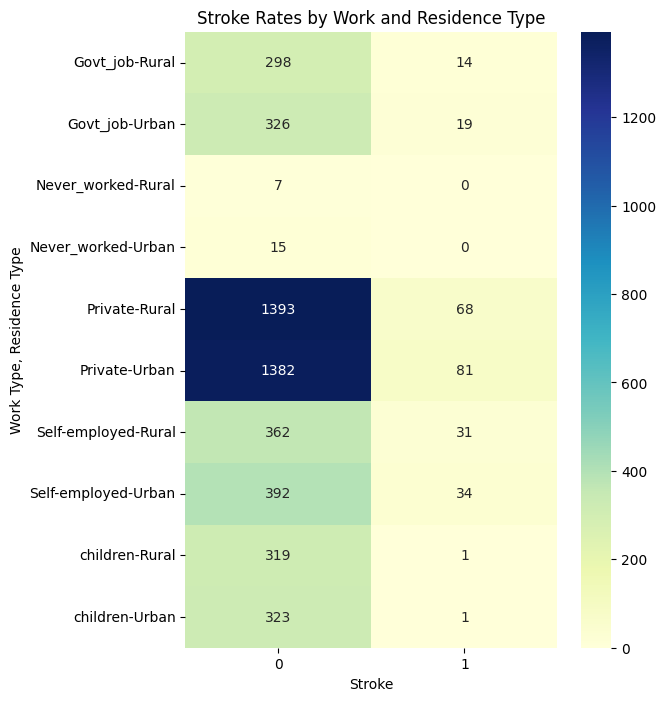

In [ ]:
# heatmap from the contingency table
plt.figure(figsize=(6, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Stroke Rates by Work and Residence Type')
plt.ylabel('Work Type, Residence Type')
plt.xlabel('Stroke')
plt.show()

# Label Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Prepare data for logistic regression
# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    data[col] = le.fit_transform(data[col])

# Features matrix and target variable

In [ ]:
# Define features (X) and target (y)
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split Data

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Accuracy

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9388560157790927
